# Taller evaluable sobre la extracción, transformación y visualización de datos usando IPython

**Juan David Velásquez Henao**   
jdvelasq@unal.edu.co  
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia 

# Instrucciones

En la carpeta 'Taller' del repositorio 'ETVL-IPython' se encuentran los archivos 'Precio_Bolsa_Nacional_($kwh)_'*'.xls' en formato de Microsoft Excel, los cuales contienen los precios históricos horarios de la electricidad para el mercado eléctrico Colombiano entre los años 1995 y 2017 en COL-PESOS/kWh. A partir de la información suministrada resuelva los siguientes puntos usando el lenguaje de programación Python. 

# Preguntas

**1.--** Lea los archivos y cree una tabla única concatenando la información para cada uno de los años. Imprima el encabezamiento de la tabla usando `head()`. 

In [21]:
import pandas as pd
x=[]
for n in range (1995,2018):
    if n<2000:
        skip = 3
    else:
         skip=2   
    nombrearchivo="Precio_Bolsa_Nacional_($kwh)_"+str(n)
    if n>=2016:
        nombrearchivo += ".xls"
    else:
        nombrearchivo += ".xlsx"
    y= pd.read_excel (nombrearchivo,skiprows=skip,parse_cols=24)
    x.append(y)
z=pd.concat(x)
z.head()

,Fecha,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,1995-07-20,NaN,1.073,1.073,1.073,1.073,1.073,1.073,1.073,1.074,...,1.073,1.073,1.073,1.073,1.074,1.897,1.897,1.897,1.073,1.073
1,1995-07-21,1.073,1.000,1.000,1.000,1.000,1.000,5.000,6.000,6.000,...,5.000,1.000,1.000,5.000,12.000,16.670,11.929,5.000,1.000,1.000
2,1995-07-22,1.073,1.073,1.000,1.000,1.000,1.073,1.303,1.303,1.303,...,1.073,1.000,1.000,1.000,1.303,2.500,2.500,1.303,1.073,1.073
3,1995-07-23,1.073,1.000,1.000,1.000,1.000,1.000,0.100,1.000,1.000,...,1.000,0.100,0.100,1.000,1.238,1.238,1.238,1.238,1.073,1.000
4,1995-07-24,1.000,1.000,0.990,1.000,1.000,1.073,3.000,3.000,3.000,...,1.073,1.073,3.000,2.000,18.630,22.500,9.256,3.000,1.073,1.000


**2.--** Compute e imprima el número de registros con datos faltantes.

In [2]:
y=z.dropna()  # forma un nuevo archivo eliminando los registros faltantes
len(z)-len(y)

28

**3.--** Compute e imprima el número de registros duplicados.

In [3]:
len(z[z.duplicated()])

67

**4.--** Elimine los registros con datos duplicados o datos faltantes, e imprima la cantidad de registros que quedan (registros completos).

In [23]:
y=z.dropna()  # eliminamos datos faltantes
y=y.drop_duplicates() #elimina los duplicados
len(y)

7875

**5.--** Compute y grafique el precio primedio diario.

In [24]:
w=y.mean(axis=1)
y["Promedio"]=w
y.head()

,Fecha,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,Promedio
1,1995-07-21,1.073,1.000,1.000,1.00,1.00,1.000,5.000,6.000,6.000,...,1.000,1.000,5.000,12.000,16.670,11.929,5.000,1.000,1.000,4.924333
2,1995-07-22,1.073,1.073,1.000,1.00,1.00,1.073,1.303,1.303,1.303,...,1.000,1.000,1.000,1.303,2.500,2.500,1.303,1.073,1.073,1.269500
3,1995-07-23,1.073,1.000,1.000,1.00,1.00,1.000,0.100,1.000,1.000,...,0.100,0.100,1.000,1.238,1.238,1.238,1.238,1.073,1.000,0.953083
4,1995-07-24,1.000,1.000,0.990,1.00,1.00,1.073,3.000,3.000,3.000,...,1.073,3.000,2.000,18.630,22.500,9.256,3.000,1.073,1.000,4.305917
5,1995-07-25,0.990,0.990,0.989,0.99,0.99,1.073,1.263,1.263,1.263,...,1.073,1.073,1.073,1.263,1.500,1.263,1.263,1.073,0.990,1.149167


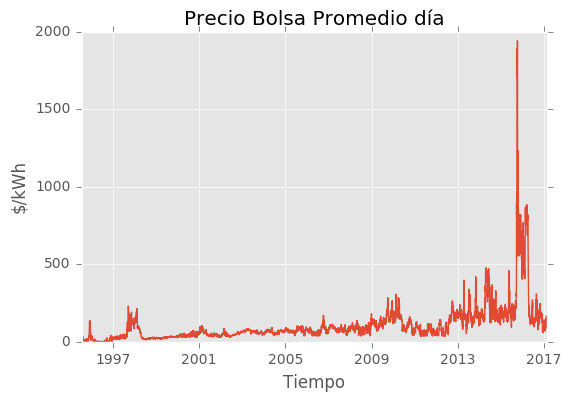

In [6]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
a = pd.to_datetime(y["Fecha"])
b = y["Promedio"]
plt.plot(a,b)
plt.ylabel("$/kWh")
plt.xlabel ("Tiempo")
plt.title ("Precio Bolsa Promedio día")
plt.show()

**6.--** Compute y grafique el precio horario máximo por mes.

In [7]:
v=[]
for n in range (len(y["Fecha"])):
    v.append(str(y.iloc[n,0])[0:7])
y["año-mes"]=v
y.head()

,Fecha,0,1,2,3,4,5,6,7,8,...,16,17,18,19,20,21,22,23,Promedio,año-mes
1,1995-07-21,1.073,1.000,1.000,1.00,1.00,1.000,5.000,6.000,6.000,...,1.000,5.000,12.000,16.670,11.929,5.000,1.000,1.000,4.924333,1995-07
2,1995-07-22,1.073,1.073,1.000,1.00,1.00,1.073,1.303,1.303,1.303,...,1.000,1.000,1.303,2.500,2.500,1.303,1.073,1.073,1.269500,1995-07
3,1995-07-23,1.073,1.000,1.000,1.00,1.00,1.000,0.100,1.000,1.000,...,0.100,1.000,1.238,1.238,1.238,1.238,1.073,1.000,0.953083,1995-07
4,1995-07-24,1.000,1.000,0.990,1.00,1.00,1.073,3.000,3.000,3.000,...,3.000,2.000,18.630,22.500,9.256,3.000,1.073,1.000,4.305917,1995-07
5,1995-07-25,0.990,0.990,0.989,0.99,0.99,1.073,1.263,1.263,1.263,...,1.073,1.073,1.263,1.500,1.263,1.263,1.073,0.990,1.149167,1995-07


In [8]:
Maxmes=y.groupby("año-mes").max()
Maxmes=Maxmes.max(axis=1)
Maxmes.head()

año-mes
1995-07     22.500
1995-08     40.000
1995-09     40.572
1995-10     33.700
1995-11    111.907
dtype: float64

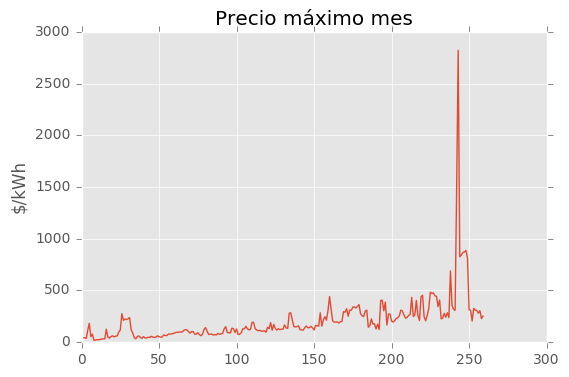

In [9]:
plt.plot(range(len(Maxmes)),Maxmes)
plt.ylabel("$/kWh")
plt.title ("Precio máximo mes")
plt.show()

**7.--** Compute y grafique el precio horario mínimo mensual.

In [10]:
Minmes=y.groupby("año-mes").min()
Minmes=Minmes.min(axis=1)
Minmes.head()

año-mes
1995-07    0.000
1995-08    0.000
1995-09    1.073
1995-10    0.000
1995-11    1.072
dtype: float64

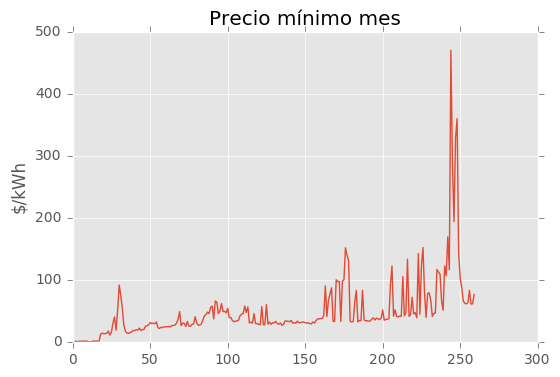

In [11]:
plt.plot(range(len(Minmes)),Minmes)
plt.ylabel("$/kWh")
plt.title ("Precio mínimo mes")
plt.show()

**8.--** Haga un gráfico para comparar el precio máximo del mes (para cada mes) y el precio promedio mensual.

In [12]:
Promes=y.groupby("año-mes").mean()
Promes=Promes.mean(axis=1)

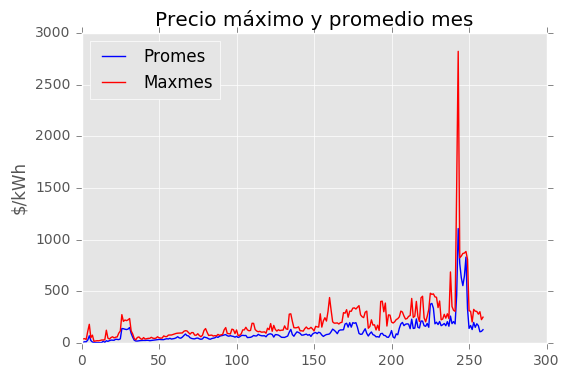

In [13]:
plot1, =plt.plot(range(len(Promes)),Promes,label="Promes",color="blue")
plot2, =plt.plot(range(len(Maxmes)),Maxmes,label="Maxmes",color="red")
plt.legend(handles=[plot1, plot2],loc=2)
plt.ylabel("$/kWh")
plt.title ("Precio máximo y promedio mes")
plt.show()

**9.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días laborales.

In [14]:
Dia=[1,2,3,1,1,1,1]*int(len(y)/7)  ## el 21 de julio es viernes.  laborales 1, sabado 2 domingo 3
y["Dia"]=Dia

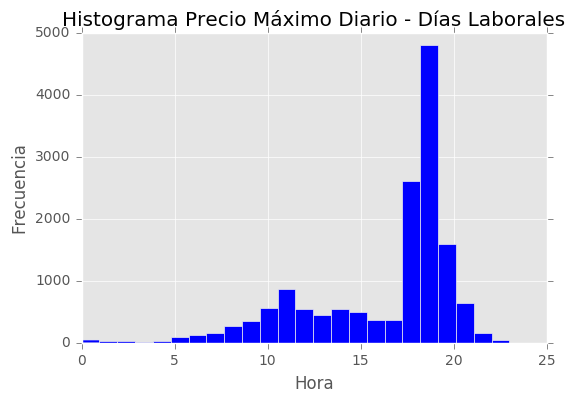

In [16]:
laboral=y[y["Dia"]==1]  ## Dias laborales
laboralindex=["line_{}".format(n) for n in range(len(laboral))]
laboral.index=laboralindex
ymaxhd=[]
ymaxh1d=[]
for n in range(len(laboral)):
    ymaxh1d=pd.Series(laboral.loc["line_"+str(n)]).values[1:25]
    ymaxhd.append ([i for i,e in enumerate(ymaxh1d) if e== max(ymaxh1d)])
contar=[]
for n in range (len(ymaxhd)):
    for i in range (len(ymaxhd[n])):
        contar.append(ymaxhd[n][i])
plt.hist(contar,bins=24,color='blue')
plt.xlabel("Hora")
plt.ylabel("Frecuencia")
plt.title ("Histograma Precio Máximo Diario - Días Laborales")
plt.show()

**10.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días sabado.

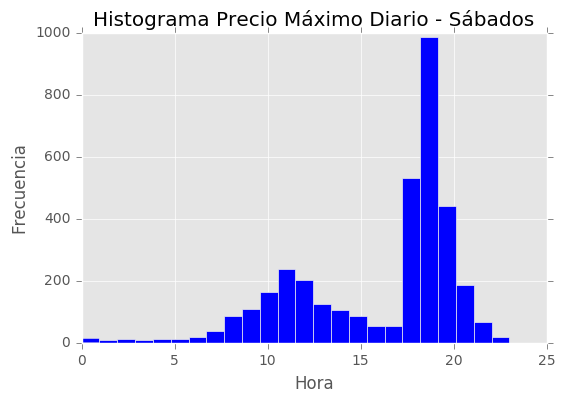

In [17]:
laboral=y[y["Dia"]==2]  ## Dias sábado
laboralindex=["line_{}".format(n) for n in range(len(laboral))]
laboral.index=laboralindex
ymaxhd=[]
ymaxh1d=[]
for n in range(len(laboral)):
    ymaxh1d=pd.Series(laboral.loc["line_"+str(n)]).values[1:25]
    ymaxhd.append ([i for i,e in enumerate(ymaxh1d) if e== max(ymaxh1d)])
contar=[]
for n in range (len(ymaxhd)):
    for i in range (len(ymaxhd[n])):
        contar.append(ymaxhd[n][i])
plt.hist(contar,bins=24,color='blue')
plt.xlabel("Hora")
plt.ylabel("Frecuencia")
plt.title ("Histograma Precio Máximo Diario - Sábados")
plt.show()

**11.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días domingo.

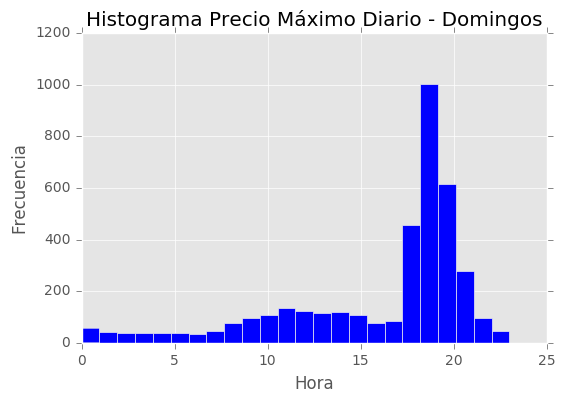

In [18]:
laboral=y[y["Dia"]==3]  ## Dias Domingo
laboralindex=["line_{}".format(n) for n in range(len(laboral))]
laboral.index=laboralindex
ymaxhd=[]
ymaxh1d=[]
for n in range(len(laboral)):
    ymaxh1d=pd.Series(laboral.loc["line_"+str(n)]).values[1:25]
    ymaxhd.append ([i for i,e in enumerate(ymaxh1d) if e== max(ymaxh1d)])
contar=[]
for n in range (len(ymaxhd)):
    for i in range (len(ymaxhd[n])):
        contar.append(ymaxhd[n][i])
plt.hist(contar,bins=24,color='blue')
plt.xlabel("Hora")
plt.ylabel("Frecuencia")
plt.title ("Histograma Precio Máximo Diario - Domingos")
plt.show()

**12.--** Imprima una tabla con la fecha y el valor más bajo por año del precio de bolsa.

In [26]:
w=y.min(axis=1)
y["Min"]=w

In [52]:
v=[]
for n in range (len(y["Fecha"])):
    v.append(str(y.iloc[n,0])[0:4])
y["año"]=v
y.tail()

,Fecha,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,Promedio,Min,año,año-mes,Promedio-mes
38,2017-02-08,116.070672,116.070672,116.070672,116.070672,116.070672,116.070672,119.070672,119.070672,126.570672,...,249.215672,151.070672,126.570672,126.570672,116.070672,131.514214,116.070672,2017,2017-02,126.522455
39,2017-02-09,117.853455,125.852455,110.853455,110.853455,115.833455,125.852455,125.852455,125.852455,125.853455,...,206.853455,182.353455,125.853455,125.852455,117.853455,133.727413,110.853455,2017,2017-02,126.522455
40,2017-02-10,133.799407,133.799407,117.799407,117.799407,125.699407,133.799407,133.799407,133.799407,161.798407,...,206.799407,221.799407,161.798407,161.798407,133.799407,167.128157,117.799407,2017,2017-02,126.522455
41,2017-02-11,132.603212,131.604212,131.604212,131.604212,131.604212,131.604212,132.603212,132.603212,132.603212,...,207.604212,163.104212,162.604212,162.604212,132.603212,151.908170,131.604212,2017,2017-02,126.522455
42,2017-02-12,141.109843,141.109843,141.109843,139.610843,128.110843,162.010843,128.110843,128.110843,141.109843,...,162.010843,151.110843,151.110843,141.109843,141.109843,142.414385,128.110843,2017,2017-02,126.522455


In [58]:
## Mínimo Pbolsa por año
Minano=y.groupby("año").min()
Minano=Minano.min(axis=1)
Minano

año
1995     0.000000
1996     0.000000
1997    10.882310
1998    13.847330
1999    18.359530
2000    21.531167
2001    24.822879
2002    26.777682
2003    37.013438
2004    32.252998
2005    27.581415
2006    26.714797
2007    30.173824
2008    29.199135
2009    32.892503
2010    32.024957
2011    33.291100
2012    34.988099
2013    40.415346
2014    38.941951
2015    46.791501
2016    61.100689
2017    61.356315
dtype: float64

In [28]:
## Como el mínimo ocurre más de una fecha del año, se buscarán las fechas en que se presentó.
Tabla=[]
for j in range (1995,2018):  # se hace un recorrido por años
    ano = y[y["año"]==str(j)]
    ano=ano[["Fecha","año","Min"]] # se elije tabla solo con columnas fecha, año y minimo
    minano=[]
    minano1=[]
    minano1=pd.Series(ano["Min"]).values # se elije la serie de mínimos para el año
    minano.append ([i for i,e in enumerate(minano1) if e== min(minano1)]) #posición del mínimo
    #artificio para volver a una serie lo obtenido
    contar=[]
    for n in range (len(minano)):
        for i in range (len(minano[n])):
            contar.append(minano[n][i])
    # Creación de tabla con fecha del mínimo, el mínimo y el año
    Tfecha=[]
    Tano=[]
    Tmin=[]
    for n in range (len(contar)):
        Tfecha.append(ano.iloc[contar[n],0]) #Usando la posición lee el valor del archivo original "ano"
        Tano.append(ano.iloc[contar[n],1])
        Tmin.append(ano.iloc[contar[n],2])
    Total=[]
    Total=pd.DataFrame(Tano, columns=["Año"])
    Total ["Mínimo"]=Tmin
    Total ["Fechas_ocurrencia"]=Tfecha
    Tabla.append(Total)
Ttabla=pd.concat(Tabla)
Ttabla

,Año,Mínimo,Fechas_ocurrencia
0,1995,0.000000,1995-07-26
1,1995,0.000000,1995-07-28
2,1995,0.000000,1995-07-29
3,1995,0.000000,1995-07-30
4,1995,0.000000,1995-07-31
5,1995,0.000000,1995-08-01
6,1995,0.000000,1995-10-13
0,1996,0.000000,1996-05-10 00:00:00
1,1996,0.000000,1996-06-30 00:00:00
2,1996,0.000000,1996-07-04 00:00:00


**13.--** Haga una gráfica en que se muestre el precio promedio diario y el precio promedio mensual.

In [29]:
##Adiciono columna año-mes a y
v=[]
for n in range (len(y["Fecha"])):
    v.append(str(y.iloc[n,0])[0:7])
y["año-mes"]=v

In [30]:
##Calculo promedio mes
Promes=y.groupby("año-mes").mean()
Promes=Promes.mean(axis=1)

In [31]:
## Se almacena en lista los años-meses
p=list(Promes.axes[0])

In [32]:
tanomes=[]
for n in range(len(p)): 
    mes=[Promes[n]]*len(y[y["año-mes"]==p[n]])
    tanomes.append(mes)
##tanomes
#artificio para volver a una serie lo obtenido
contar=[]
for n in range (len(tanomes)):
    for i in range (len(tanomes[n])):
        contar.append(tanomes[n][i])

In [33]:
##Adiciono columna Promedio-mes
y["Promedio-mes"]=contar

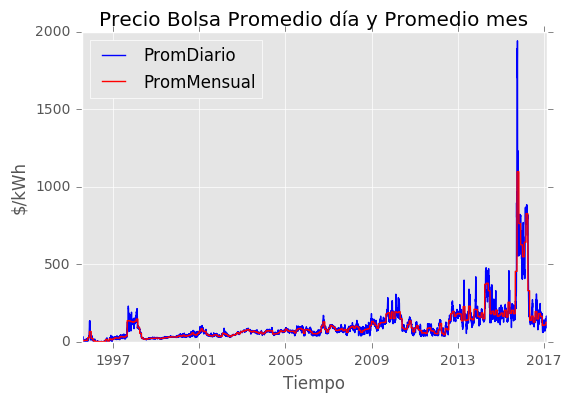

In [37]:
##Grafico
import matplotlib.pyplot as plt
a = pd.to_datetime(y["Fecha"])
b = y["Promedio"]
c = y["Promedio-mes"]
plot1, =plt.plot(a,b, label="PromDiario",color="blue")
plot2, =plt.plot(a,c,label="PromMensual",color="red")
plt.legend(handles=[plot1, plot2],loc=2)
plt.ylabel("$/kWh")
plt.xlabel ("Tiempo")
plt.title ("Precio Bolsa Promedio día y Promedio mes")
plt.show()

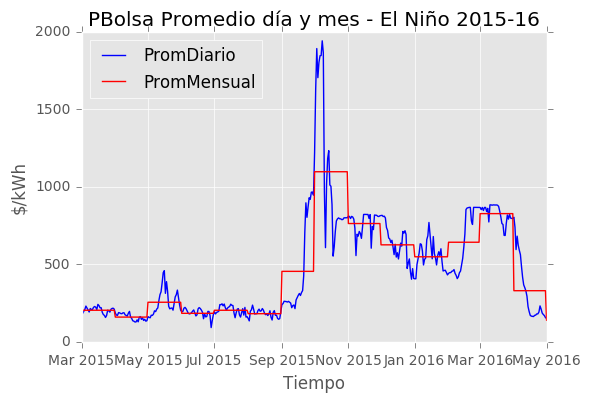

In [51]:
##Zoom sobre la época de El Niño 2015 - 2016
a = pd.to_datetime(y["Fecha"])
b = y["Promedio"]
c = y["Promedio-mes"]
plot1, =plt.plot(a,b, label="PromDiario",color="blue")
plot2, =plt.plot(a,c,label="PromMensual",color="red")
plt.legend(handles=[plot1, plot2],loc=2)
plt.ylabel("$/kWh")
plt.xlabel ("Tiempo")
plt.title ("PBolsa Promedio día y mes - El Niño 2015-16")
plt.xlim(pd.to_datetime("2015-03"),pd.to_datetime("2016-05")) ## solo años 2015 - 2016
plt.show()

---